In [1]:
# Data
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt

### Load data

In [2]:
with np.load('../data/training-dataset.npz') as data:
    img = data['x']
    lbl = data['y']

## Inspect Data

In [3]:
def convert_label(label):
    '''Returns the letter that is associated with the label'''
    return chr(label+64).upper()

In [4]:
# Label distribution
letters = [convert_label(l) for l in lbl]
df = pd.DataFrame({'label': letters})
with pd.option_context('display.max_columns', 26):
    print(df.label.value_counts().sort_index().to_frame().T)

          A     B     C     D     E     F     G     H     I     J     K     L  \
label  4800  4800  4800  4800  4800  4800  4800  4800  4800  4800  4800  4800   

          M     N     O     P     Q     R     S     T     U     V     W     X  \
label  4800  4800  4800  4800  4800  4800  4800  4800  4800  4800  4800  4800   

          Y     Z  
label  4800  4800  


In [5]:
def plot_image(image, label=False):
    '''Displays the image associated with the input index'''  
    fig, ax = plt.subplots(figsize=(3,3), facecolor='w')
    
    ax.imshow(image.reshape(28,28), cmap='binary')
    ax.axis('off')
    
    if label:
        image_label = convert_label(label)
        ax.set_title(f'Label: {image_label}', fontsize=20)
    
    plt.show()

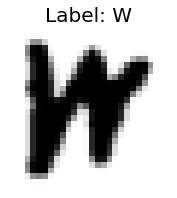

In [6]:
index = 0
image = img[index]
label = lbl[index]

plot_image(image, label)

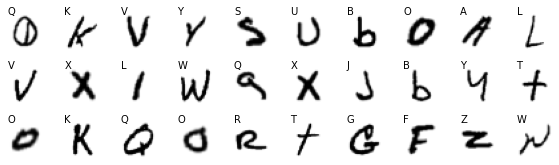

In [8]:
np.random.seed(42)

# Grid of random example images and their labels
ROWS, COLS = 3, 10

fig, axes = plt.subplots(ROWS, COLS,
                         figsize=(COLS*0.8, ROWS*0.8),
                         facecolor='w')

for i in range(ROWS):
    for j in range(COLS):
        index = np.random.randint(len(img))
        image = img[index].reshape(28,28)
        label = convert_label(lbl[index])
        
        axes[i,j].imshow(image, cmap='binary')
        axes[i,j].text(0, 0, label)
        axes[i,j].axis('off')

plt.tight_layout()
plt.savefig('../figures/examples.png', dpi=300)
plt.show()